#  Gaussian Processes

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas as pd
import pymc3 as pm
%matplotlib inline
#from scipy import stats

## Problem: 
Generate (x, y) points from the following function y = x*sin(x) where x can take values 0, 2, 4, 6, 8, 10, 12 and 14.

a)     Perform regression using Gaussian processes. Show the regression curve together with 95% confidence intervals. Try 2 kernels of your choice and explain results.

b)     Find the mean and the variance of the prediction $y_*$ for the following values of $x_*$: 1, 14.5 and 18.




Solve:

Please note that the solution is provided using sklearn Gaussian process library.

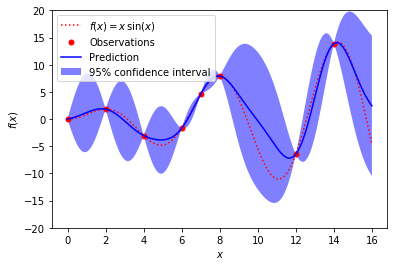

In [19]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import Matern
np.random.seed(1)


def f(x):
    return x * np.sin(x)


X = np.atleast_2d([0., 2., 4., 6. ,7. ,8, 12, 14]).T
y = f(X).ravel()

x = np.atleast_2d(np.linspace(0, 16, 1000)).T

# Instanciate a Gaussian Process model
#kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),nu=1.5)
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=50)
gp.fit(X, y)

y_pred, sigma = gp.predict(x, return_std=True)

fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-20, 20)
plt.legend(loc='upper left')
plt.show()


In [20]:
# part b)
Xtest = np.array([1, 14.5, 18]).reshape(-1,1)
y_pred, sigma = gp.predict(Xtest, return_std=True)

y1_f=f(Xtest)
print('The mean of predictions: ',y_pred)
print('The value of the function is: ',y1_f)
print('The standard deviation of predictions: ',sigma)


The mean of predictions:  [  1.19099452e+00   1.31326987e+01   1.01262918e-02]
The value of the function is:  [[  0.84147098]
 [ 13.55597831]
 [-13.51777044]]
The standard deviation of predictions:  [ 3.68008673  2.96082964  6.67210671]


The mean and the standard deviation of the prediction $y_*$ for the following values of $x_*$: 1 is 1.19 and 3.68.

The mean and the standard deviation of the prediction $y_*$ for the following values of $x_*$: 14.5 is 13.13 and 2.9.

The mean and the standard deviation of the prediction $y_*$ for the following values of $x_*$: 18 is 0.01 and 6.67.

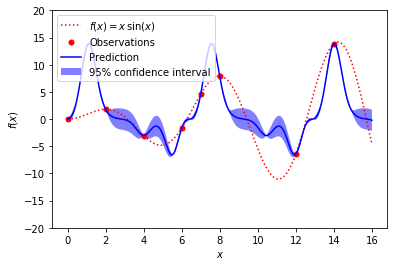

In [26]:
# a) Using different Kernel
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import Matern, ExpSineSquared
np.random.seed(1)


def f(x):
    return x * np.sin(x)


X = np.atleast_2d([0., 2., 4., 6. ,7. ,12, 14, 8.]).T
y = f(X).ravel()

x = np.atleast_2d(np.linspace(0, 16, 1000)).T

# Instanciate a Gaussian Process model
#kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),nu=1.5)
kernel =ExpSineSquared(length_scale=0.2, periodicity=1.0,
                                length_scale_bounds=(0.01, 100.0),
                                periodicity_bounds=(0.1, 10.0))
#kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)
gp.fit(X, y)

y_pred, sigma = gp.predict(x, return_std=True)

fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-20, 20)
plt.legend(loc='upper left')
plt.show()